# COM4509/6509 Assignment 2024

Hello, this is the programming assignment for *Machine Learning and Adaptive Intelligence*. This is worth 50% of the module grade, the remaining 50% will be assessed via the formal exam.

**Deadline: 13th December 2024, 23:59**

Please submit well before the deadline as there may  be delays in the submission. Submission will be via Blackboard.

There are 2 parts to this assignment, covering different portions of the course. Both parts are worth 50 marks to give a combined total of 100 marks. Both contain a set of questions which will ask you to implement various machine learning algorithms that are covered throughout the course. You will receive marks for the correctness of your implementations, text based responses to certain questions and the quality of your code. Each question indicates how many marks are available.

### Use of unfair means and Generative AI

For this assignment **you must not use code/text produced by generative AI, that is created using a prompt**. The 'autocomplete' feature in colab can still be used.

This is an individual assignment, while you may discuss this with your classmates, **please make sure you submit your own code**. You are allowed to use code from the labs as a basis of your submission.

The university's policy on the use of GenAI is on [this page](https://www.sheffield.ac.uk/study-skills/digital/generative-ai/assessment).

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).

### Assignment help

If you are stuck and unsure what you need to do then please ask either in the lectures, labs or on the discussion board. There is a limit to what help we can provide but where possible we will give general guidance with how to proceed.

We are happy for you to discuss the assignment with other students but your code and test answers **must** be your own.

### What to submit

- You need to submit a **pdf** of your notebook *and* the **notebook**. Please name them:

```
assignment_[username].ipynb
assignment_[username].pdf
```
replacing `[username]` with your username, e.g. `abc18de`.

- **Please execute the cells before your submission**, so we can see the results in the pdf. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the python notebook *and the pdf*.

### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).


# Part 1: Tracking Bees

### Overview
This part of the assignment will cover lectures:
 - 1, Introduction to Machine Learning
 - 2, parts of End-to-End ML
 - 4, Linear regression

### Allowed libraries
For this part we are looking for you to demonstrate what you have learned in this module - the libraries needed are already imported in the code below - you shouldn't need to import any other library.

### Marks

There are 50 marks available for this half of the coursework (45 in the nine questions below, and 5 for code quality and clarity). The marks for code quality does not cover the correctness of your answers to each section but rather the style and clarity of your code. You should aim to avoid repetition of code, have clear but concise comments and appropriately named variables.

You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

# Imports and Datafiles

In [ ]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

urllib.request.urlretrieve('https://drive.usercontent.google.com/download?id=1XrXVkEfFtgA9VlU2rP4-gGdI_7-TmJ4k&export=download&authuser=0','bee_flightpaths.npy')
dataset = np.load('bee_flightpaths.npy',allow_pickle=True)

Nbases = 10 #number of bases per axis


# Part 1: Finding the path of the bee

In lectures, I briefly mentioned the problem of inferring the path of a bumblebee. For this half of the coursework you will be required to reconstruct the flight path of a series of bees!

The tracking system consists of four detectors in the landscape. Each one occasionally detects the bee and records its bearing (the direction the bee is in).

In the figure the detectors are marked as green circles, the true path of the bee is the red line. In this example the detectors record the direction of the bee at five times (0s, 0.9s, 1.8s, 2.7s, 3.6s). The blue lines indicate the bearing of the bee at each of those times.

<img src="https://drive.usercontent.google.com/download?id=1IIaTWlqDuUla6tmL2usinWcOs_aJknb7&export=download&authuser=0&confirm=t&uuid=ee31fadf-4593-468f-b759-6a418767006c&at=AENtkXYQ8DcCgp1c8l__xmzCyWQp:1730720770038" />

*Flight path of the bee and the bearings from the detector from<br/>which it was observed -- notice we only get the bearing of the<br/>bee, we don't know how far away it is. Axes are in metres.*<br/><br/>

The task is to try to estimate the path of the bee, given those observations.

The dataset consists of 30 such flight paths (inside `dataset`). Each element e.g. `dataset[12]` is a flightpath dictionary containing:
 - `truepath`: An array of 100 points of the bee's flight over 30 seconds. This is an array $100 \times 3$. The first column is the time, the second and third the location (x,y) of the bee. For example:

```
 array([[  0.  , -43.11,  11.27],
       [  0.3 , -43.68,   9.49],
       [  0.61, -44.03,   7.69],
       [  0.91, -44.15,   5.88],
       [  1.21, -44.03,   4.07],
            :      :        :
```

 - `observations`: A $17 \times 5$ array of 17 observations. Each row consists of the time (column 0), the location of the detector (columns 1 and 2), and a unit vector facing in the direction of the bee (columns 3 and 4).

```
array([[  0.  , -15.  , -15.  ,  -0.73,   0.68],
       [  0.91,  15.  ,  15.  ,  -0.99,  -0.15],
       [  1.82, -15.  ,  15.  ,  -0.89,  -0.46],
       [  2.73,  15.  , -15.  ,  -0.98,   0.18],
       [  3.64, -15.  ,  15.  ,  -0.62,  -0.78],
       [  4.55,  15.  , -15.  ,  -1.  ,   0.02],
       [  5.45, -15.  , -15.  ,  -0.89,  -0.45],
           :     :       :         :       :
```

(as an example, the 2nd row is an observation at time 0.91s, from a detector at location [15,15], that saw the bee in the direction of [-0.99, -0.15]. One can see this is one of the observations in the figure above.

## Question 1: Plotting [3 marks]

First, plot the true flightpath of the bee in `dataset[1]`. Add a marker to the plot for the location at time zero.


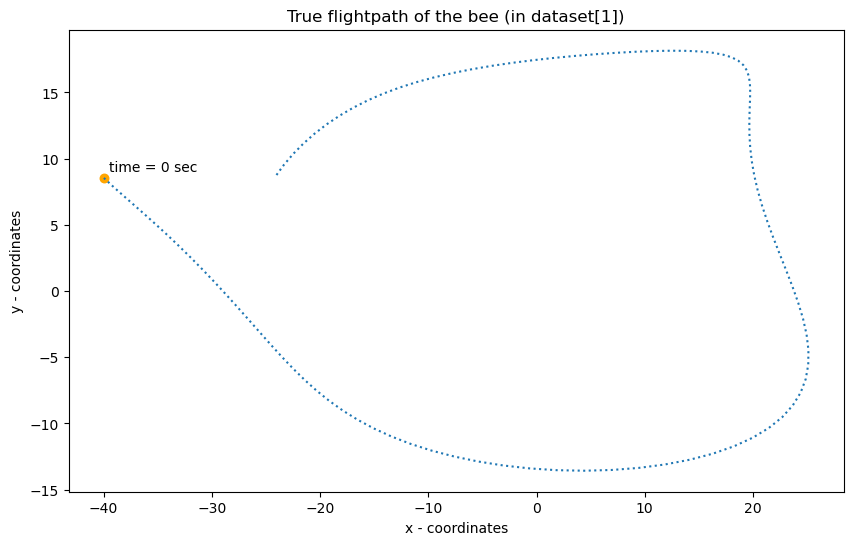

In [ ]:
#Answer here
fig, ax = plt.subplots(figsize=(10, 6))
offset = 0.5
ax.plot(dataset[1]['truepath'][:,1], dataset[1]['truepath'][:,2],linestyle='dotted')
# plot scatter plot
ax.scatter(dataset[1]['truepath'][0,1], dataset[1]['truepath'][0,2], c='orange', marker='.', s=150);
plt.text(dataset[1]['truepath'][0,1] + offset, dataset[1]['truepath'][0,2] + offset,"time = 0 sec")
ax.set_ylabel('y - coordinates')
ax.set_xlabel('x - coordinates')
ax.set_title("True flightpath of the bee (in dataset[1])")
plt.show()

## Judging a prediction

Later we will make some predictions for the flight path of the bee: I.e. for a given time point we will predict the bee's location. Before we do that we first need a way of judging how good the prediction is: We need to write down an expression for how likely an observation was given that predicted location:

$p\Big(\text{observation at time}\;t\;\Big|\;\text{position at time}\;t\Big)$

If you think back to the lecture, this is the likelihood and the '$\text{position at time}\;t$' is our model's prediction.

To be more specific we need a function that gives us the **negative log likelihood**: The negative log probability of an observation given the bee is in a particular location.

Let's think about what this means.

- We are given (a prediction for) the location of the bee, e.g. `p = np.array([9.2, 10.1])`.
- We are also given a row of our observation array, e.g. `obs = np.array([23, 5, 5, 0.707, 0.707])`.

We want to write an expression that basically tells us how bad this fit is.

Let's plot these to help us understand the task:

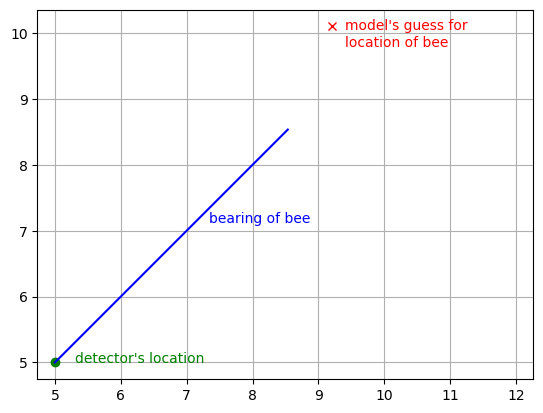

In [ ]:
p = np.array([9.2, 10.1])
ob = np.array([23, 5, 5, 0.707, 0.707])

plt.plot(p[0],p[1],'xr') #predicted position of bee
plt.text(p[0]+0.2,p[1]-0.3,'model\'s guess for\nlocation of bee',color='red')

plt.plot(ob[1],ob[2],'og') #detector position
plt.text(ob[1]+0.3,ob[2],'detector\'s location',color='green')

#blue line to show the direction of the bee in the observed direction
plt.plot([ob[1],ob[1]+5*ob[3]],[ob[2],ob[2]+5*ob[4]],'b-')
plt.text(ob[1]+3.3*ob[3],ob[2]+3*ob[4],'bearing of bee',color='blue')

plt.axis('equal')
plt.xlim([4,13])
plt.grid()

we can see that the observation is fairly consistent with the model's prediction, but isn't perfect. The predicted bee location is a little to the left of the observed direction.

## Question 2: Developing the function for the negative log likelihood [2 marks]

We need a way of assigning a probability to this observation given the prediction location.

To this end, the negative log likelihood function will:

1. Compute a unit vector, `u`, pointing in the direction of the predicted location of the bee relative to the detector. Remember for one of the observations `ob[1:3]` contains the location of the detector. We define another variable `p`, that contains the bee's predicted location. Think about how you might code this.
2. Note that we now have two unit vectors. `ob[3:5]` pointing in the observed direction of the bee, and `u`, pointed in the direction of the predicted location. *The difference between these two vectors tells us how good the prediction is*. We therefore need to compute the difference between these two vectors: Subtract one from another, and then we will find the length, $l$, of the resulting vector. If this vector is shorter it means we have a better match between the model prediction and the observation.
3.  We will assume our observations are corrupted by some independent Gaussian noise. I.e. the $l$ of this 'error vector' is from a Gaussian distribution, with mean zero, and some noise variance $\sigma^2$. So the probability of $l$ (ignoring constant factors) is,

$$p(l) \sim N(l|0,\sigma^2) \propto \text{exp}\left(\frac{-l^2}{2\sigma^2}\right)$$

We need to compute the negative log probability.

Question 2: Write down the negative log probability (ignoring constant terms), i.e.
$$-\log_e \big(p(l) \big)$$

(hint: try substituting in the expression for $p(l)$ into this expression)

**Answer :** The negative log probability will be represented by the expression
: 1/2 * (l/ σ)^2. It generally represents the **surprise** of an event.

(Side Note: It is important that the likelihood function integrates to one (or at least a fixed constant) over the domain of possible observations. This is difficult to quantify exactly in many cases. We won't worry about it for this coursework).


## Question 3: Coding the negative log likelihood [4 marks]

We now need to implement the above steps. Complete the method below.

(Hint: For each of the steps 1-3, you will need to write one or two lines inside this method).

Please use the expression you devised above for the **unnormalised** negative log probability.

In [ ]:
def negloglikelihood(ob,p,noise_scale=0.1):
  """Computes the negative log likelihood for ONE observation
    and ONE model's position prediction.

    Parameters
    ----------
    ob : (5,) array_like
        A 1d array describing an observation. Contains:
          [time,detectorx,detectory,bearingx,bearingy]
    p : (2,) array_like
        A 1d array describing a model's position prediction. Contains:
          [x,y]
    noise_scale : float, optional
        The standard deviation (\sigma) of the Gaussian noise distribution over the
        length of the vector between the unit vector pointing at the observed
        bee and the unit vector pointing at the predicted bee location.

    Returns
    -------
    float
        The negative log probability of the observation given the
        model's prediction, i.e.

                     -log p(ob|p)
    """

  # ##Answer here

  # A vector ointing in the predicted direction of the bee
  detector_location = ob[1:3] #given
  u = np.array(p) - np.array(detector_location, dtype=float)
  u /= np.linalg.norm(u)

  # direction of the observed unit vector
  observed_direction = ob[3:5]

  # error vector
  err_vector = u - observed_direction

  # square of the error vector
  l_sq = np.sum(err_vector ** 2)

  # value of negative log likelihood
  negative_log_likelihood = l_sq / (2 * noise_scale ** 2)

  return negative_log_likelihood



## Question 4: Check your solution [3 marks]

You should check your method is correct! As a simple check, let's consider a prediction that the bee is at position [50,30], and was detected by a detector
as [10,0], in unit vector direction [1,0].

Question 4: **Compute by hand:**

- the unit vector facing in the predicted direction of the bee from the detector
- the difference "error vector" between this vector and the unit vector pointing in the observed direction.
- the squared length of this "error vector".
- use this to compute the **unnormalised** negative log likelihood, with value of $\sigma=0.1$.

The answer should be 20.

You have two tasks,

- Q4a) Compute this by hand as described to check your answer.
- Q4b) Test that your `negloglikelihood` method also computed it as 20, by passing it the appropriate parameters.

*Hint 1: The most tricky bit will be writing the 5 elements in for the observation array, remember it needs to be of the form `np.array([time,detectorx,detectory,bearingx,bearingy])`. The 'time' element doesn't affect the result, so just put anything in for time.*

*Hint 2: You might get an error like `UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'`, this will happen if you build your array with integers and later try to overwrite one with a float. Numpy might have an issue with entering floats into an integer array. The easiest fix is to replace e.g. `10` with `10.0` when creating the array.*

# 4a
## Provide data:
Predicted bee's position:
  p = [50, 30]
  Detector's location: [10, 0]

1.   Find a unit vector, u, pointing in the direction of the predicted location from detectors location

    => u_vector = p - detector location
    
     => u_vector  = [50, 30] - [10, 0]
     
     =>  u_vector  = [40, 30]
2.   Find a unit vector in the direction of the predicted location of the bee
  
  |u_vector| = sqrt(40^2 + 30^2) = sqrt(1600 + 900) = sqrt(2500) = 50

  u_unit_vector"= [40, 30] / 50 = [0.8, 0.6]

3.   Find the vector pointing in the observed direction of the bee
    
  Already given unit vector in the observed direction: v_unit_vector = [1,0]
4.   Find the measure of difference between these two vectors, u and v. the error vector

    the error vector, l = u_unit_vector - v_unit_vector

    l =  [0.8, 0.6] - [1, 0] = [-0.2, 0.6]

5.   Compute negative log likelihood, given by, loge(p(l)) = l^2 / (2 * σ^2)

  Since we have to find, loge(p(l)) = l^2 / (2 * σ^2)

  Focussing on the numerator,

  l^2 = (-0.2)^2 + (0.6)^2 = 0.04 + 0.36 = 0.4

  Since, loge(p(l)) = l^2 / (2 * σ^2)

  loge(p(l)) = (l^2 / (2 * σ^2)) = (0.4/(2 * (0.1)^2)) = 20

  Thus, the negative log likelihood comes out to be 20 (19.999 in my case).


In [ ]:
#Q4b) Check for the above example negloglikelihood returns about 20.
# You need to write something like, negloglikelihood(5_element_observation_array_here,2_element_predicted_location_array_here)

# Hint: It might not give exactly 20, but 19.99999 would be fine!
# Given values
predicted_location = np.array([50, 30])
observations = np.array([0, 10, 0, 1, 0])
# Make the function
negloglike_value= negloglikelihood(observations, predicted_location, noise_scale=0.1)
# output of Negloglikelihood
print(negloglike_value)

19.999999999999993


## Linear regression

To make our predictions we need to predict the $x$ coordinate and the $y$ coordinate of the bee over time.

To do this we will use linear regression (but note that our likelihood function is not going to be amenable to a closed form solution).

We will use a Gaussian basis, and predict the location along each axis separately -- i.e. one regression problem will be 'what is x at time t?' and the other is 'what is y at time t?'

## Question 5: Prediction function [4 marks]

For our linear regression prediction we have a set of B=10 Gaussian bases centred at times $c_b = -3, 1, 5, 9,...,25, 29, 33$, each with a width hyperparameter of $\alpha=3$. We have a set of parameters, $\textbf{w}$, that we will later need to fit. The prediction at a time $t$ will equal:

$$ \sum_{b=1}^B w_b \;\text{exp}\Big(-\frac{(t-c_b)^2}{2 \alpha^2}\Big)$$

Write a function that takes a list of N times, e.g. `T = [1,2,3.5,4.5,6]` and a list of B parameters, e.g. `w = [1.2, -3.1, 4.5]` and returns the N predictions associated with those times.

*Hint: You could use `basis_centres = np.arange(-3,34,4)` to get a numpy array of the locations of the basis centres.*

In [ ]:
def getpred(T,w,width=3):
  """Computes a prediction using linear regression and 10 Gaussian bases, each
     is centred at -3,1,5,9...25,29,33 seconds. They have a width specified by
     the `width` parameter.

    Parameters
    ----------
    T : (N,) array_like
        A 1d array of times (in seconds) to make the predictions.
    w : (10,) array_like
        A 1d array of the 10 parameters (the weights that each basis function
           is scaled by.
    width : float, optional
        The width of each Gaussian basis function (default = 3 seconds).

    Returns
    -------
    (N,) array_like
        The prediction for each time point in T, i.e.

                     sum_b w_b exp(-(t-c_b)^2/(alpha^2))

        where each c_b is the time at the centre of each basis.
    """

  #Answer here
  # An array for predictions
  preds = np.zeros(len(T))
  # basis centers are given above (as per hint)
  basis_centres = np.arange(-3, 34, 4)
  ## calculate predictions, for each time t, in T
  for index, time in enumerate(T):
      prediction = 0
      # Loop over the bases centres to find prediction for each centre and time
      for centre in range(len(basis_centres)):
          c_b = basis_centres[centre]
          prediction += w[centre] * np.exp(-(time - c_b)**2 / (2 * width**2))
      preds[index] = prediction

  return preds

In [ ]:
testw = np.zeros(10)
getpred(np.array([13]),testw)

array([0.])

In [ ]:
testw = np.zeros(10)
testw[4] = 3.0 #this is for the basis at t=13
assert getpred(np.array([13]),testw)[0]==3.0

In [ ]:
print(getpred(np.array([13]),testw))

[3.]


In [ ]:
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([15]),testw)[0] #15 is mid point
prediction

8.00737402916808

In [ ]:
getpred(np.array([13]),testw)[0]==2.0

False

In [ ]:
testw

array([0., 0., 0., 0., 4., 6., 0., 0., 0., 0.])

### Test your prediction function...

Here's a couple of tests to let you check if your code is correct.

In [ ]:
#We use 'assert' to check that your method produces the right answers...

# if we pick a time exactly on the centre of a basis, with all the other bases
# equal to zero we should get that value...
testw = np.zeros(10)
testw[4] = 3.0 #this is for the basis at t=13
assert getpred(np.array([13]),testw)[0]==3.0

#if we take a point between two of our bases, each basis will contribute
#np.exp(-2**2/(2*3**2)) to the points value, so if we set all the other bases
#to zero, we would expect the point to equal:
#    np.exp(-2**2/(2*3**2))*(sum_of_the_two_bases)
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([15]),testw)[0] #15 is mid point
assert np.abs(np.exp(-2**2/(2*3**2))*(4+6)-prediction)<0.01

#test again with a change in the width of the gaussians.
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([0,15]),testw,width=4) #15 is mid point
assert np.abs(np.exp(-2**2/(2*4**2))*(4+6)-prediction[1])<0.01
assert np.abs(0.02-prediction[0])<0.01 #this is far from these basis fns so should be about zero.

We can produce a 2d array of prediction locations by doing two lots of regression to predict the x coordinate and to predict the y coordinate.

Here we use some random values for the 20 parameters (10 for each coordinate axis).

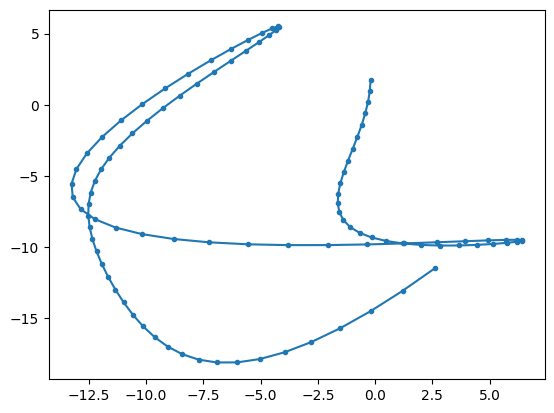

In [ ]:
np.random.seed(1)
pred_t = np.linspace(0,30,100) #times to predict for... (100 points from 0s to 30s)

#we use Nbases*2 (=20) parameters (10 for the x-axis regression, 10 for the y-axis regression)
example_w = 10*np.random.randn(Nbases*2) #randomly sample some parameters.

x_predictions = getpred(pred_t,example_w[:Nbases]) #uses first 10 parameters in 'example_w' to predict x location over time
y_predictions = getpred(pred_t,example_w[Nbases:]) #uses last 10 parameters in 'example_w' to predict y location over time

#concantenate the two vectors into an array of Nx2 coordinates.
predpath = np.array([x_predictions,y_predictions]).T

#plot this path
plt.plot(predpath[:,0],predpath[:,1],'.-')
plt.show()

Note, rather than write out `dataset[1]['observations']` we save it in `obs` for convenience.

In the next step, we will want to try to fit our observations. To do this **we will first need to compute the predicted location at each of the times we observed the bee**. Those times are in the first column of `obs`, i.e.: `obs[:,0]`; the 'time' column in the observation vector.

In [ ]:
obs = dataset[1]['observations']
truepath = dataset[1]['truepath']

In [ ]:
obs[:,0] #this gets the times we've seen the bee from the detectors

array([ 0.        ,  1.81818182,  3.63636364,  5.45454545,  7.27272727,
        9.09090909, 10.90909091, 12.72727273, 14.54545455, 16.36363636,
       18.18181818, 20.        , 21.81818182, 23.63636364, 25.45454545,
       27.27272727, 29.09090909])

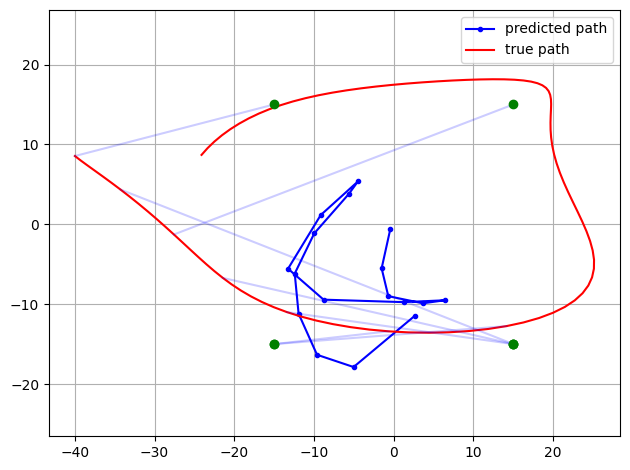

In [ ]:
np.random.seed(1)
example_w = 10*np.random.randn(Nbases*2) #again, we'll use random parameter values

#!!!!!!!hint the next line might be useful later...!!!!!!!#
#we predict the path for the times we made observations...
#predpath is an Nx2 array of predicted locations (each row is the x,y coordinate
#at the times in obs[:,0]).
predpath = np.array([getpred(obs[:,0],example_w[:Nbases]),getpred(obs[:,0],example_w[Nbases:])]).T
plt.plot(predpath[:,0],predpath[:,1],'.-b',label='predicted path')
plt.plot(truepath[:,1],truepath[:,2],'-r',label='true path')

#just plot first 7 observation vectors to illustrate...
for ob in obs[:7]:
  r = np.sqrt(np.sum((truepath[np.argmin(np.abs(truepath[:,0]-ob[0])),1:3]-ob[1:3])**2))

  plt.plot([ob[1],ob[1]+ob[3]*r],[ob[2],ob[2]+ob[4]*r],'b-',alpha=0.2)
  plt.plot(ob[1],ob[2],'og')
plt.axis('equal')
plt.grid()
plt.tight_layout()
plt.legend()

This is obviously a poor fit at the moment as we used random values for our parameters. Let's look at how we can improve them.

I've also plotted the locations of the detectors and the first 7 observations, projected to the points on the true path where the bee was. Remember the observations only have the bearing (direction) of the bee, not the distance, so to estimate the path we need to combine the observations from the different detectors.

## Question 6: Total Negative Log Likelihood [4 marks]

For a given parameter vector, `w`, and observation array `obs` what is the TOTAL negative log likelihood (over all the observations in `obs`).

We will assume that the Gaussian noise in our model is independent between observations.

Your task:

- You need to find the negative log likelihood for each observation by calling `negloglikelihood` with parameters:

   - each row of `obs`
   - the associated predicted location at the time of the observation.
   - the `noise_scale` hyperparameter parameter.

- Add these negative log likelihoods together.

- Add an L2 regularisation penalty term to the negative log likelihood.

In summary, for each observation, `ob` (one row of `obs`), you need to know the predicted location `p` (see hint in the previous code block how to get the predicted path for each observation time - you could take each row from this path as a predicted location, `p`). Using this you need to compute `negloglikelihood(ob,p,noise_scale)`. Finally you need to add to this the L2 regularisation term. Remember to compute the L2 regularisation you need to find the sum of the squares of the values in `w`. This sum needs to be multiplied by the `reg` parameter. See the regularisation term at end of this expression.

$$\sum_{i=1}^N \text{NLL}(\text{ob}_i|p_i,\sigma^2) + \lambda \sum_{b=1}^B w_b^2$$

$\lambda$ is the `reg` parameter that controls how much regularisation to do.

*__Side Note__: Regularisation is the equivalent of putting a prior on our model, and we are therefore really optimising the posterior, and thus this is Maximum a posteriori (MAP) estimation rather than maximum likelihood. You need not worry about this distinction for this coursework!*

*__Hint__: The expression above for `predpath` will be useful here...!*

<br/>

Question 6: Code the `totalnegloglikelihood` method:

In [ ]:
def totalnegloglikelihood(w,obs,reg=0.001,noise_scale=0.1):
  """
  Computes the total negative log likelihood for the given weight, using the observations
  in `obs` and with the hyperparameters reg (regularisation) and noise_scale.

  Parameters
  ----------
  w : (20,) array_like
      A 1d array of the 20 parameters (the weights that each basis function
      is scaled by.

  obs : (N, 5) array_like
      A 2d array of the N observations. Each row of this array contains:
        [time,detectorx,detectory,bearingx,bearingy]

  reg : float, optional
      The regularisation parameter (\lambda in the equation above).

  noise_scale : float, optional
      The standard deviation (\sigma) of the Gaussian noise distribution.
  Returns
  -------
  float :
      The total negative log likelihood for the given parameters, summed over
      all the observations in obs; plus the L2 regularisation term (scaled by `reg`).
  """

  predpath = np.array([getpred(obs[:,0],w[:10]),getpred(obs[:,0],w[10:])]).T # ??? why 10, why 0
  total_neg_log_likelihood = 0

  for i in range(obs.shape[0]):
    p = negloglikelihood(obs[i,:],predpath[i],noise_scale)
    # total_neg_log_likelihood += negloglikelihood(ob[i,:],p,noise_scale)
    total_neg_log_likelihood+=p
    OUTPUT = total_neg_log_likelihood + (reg*np.sum(w**2))
  return OUTPUT

In [ ]:
obs = np.array([[1,10,0,1,0],[17,10,0,1,0]])


#for testing we set all parameters to zero, except two, this should place
#the predicted bee (at time zero) at [50,30]...
testw = np.zeros(20)
testw[1] = 50.0
testw[11] = 30.0
testw[5] = 50.0
testw[15] = 30.0
totalnegloglikelihood(testw,obs,reg=0.001)

46.7999904119674

## Testing the total negative log likelihood code

This section lets you check your implementation produces the right answers.

In [ ]:

#again, using asserts to check you have the right answers...

#I reproduce an earlier test.
#a detector at position [10,0], observes bee in direction [1,0] at time 1
#and again, in the same place at time 17.
obs = np.array([[1,10,0,1,0],[17,10,0,1,0]])

#for testing we set all parameters to zero, except two, this should place
#the predicted bee (at time zero) at [50,30]...
testw = np.zeros(20)
testw[1] = 50.0
testw[11] = 30.0
testw[5] = 50.0
testw[15] = 30.0

#we computed the likelihood earlier for each of these observations should be
#about 20. With the regularisation (0.001*(50^2+30^2)) they should each be 23.4.
#So their sum should be about 46.8.
assert np.abs(totalnegloglikelihood(testw,obs,reg=0.001)-46.8)<0.001

In [ ]:
#for testing we set all parameters to zero, except two, this should place
#the predicted bee (at time zero) at [50,30]...
testw = np.zeros(20)
testw[1] = 50.0
testw[11] = 30.0
testw[5] = 50.0
testw[15] = 30.0

#we computed the likelihood earlier for each of these observations should be
#about 20. With the regularisation (0.001*(50^2+30^2)) they should each be 23.4.
#So their sum should be about 46.8.
totalnegloglikelihood(testw,obs,reg=0.001)

46.7999904119674

## Optimising the parameters

Ideally we would used an auto-diff framework (we will next) but for now we can optimise the parameters using scipy...

Using the `minimize` method we find the vector of parameters that minimises the total negative log likelihood.

In [ ]:
from scipy.optimize import minimize

#start with random location
ws0 = np.random.randn(Nbases*2)

#we'll use dataset[1]'s observations..
obs = dataset[1]['observations']

res = minimize(totalnegloglikelihood,ws0,args=(obs,0.1,0.001))
print(res.x)

[-12.9922521  -22.35149983 -12.48110363  -7.25506626  26.0171971
   2.87514785  17.62962041  -1.56232874 -16.83840752  -4.30197339
  17.74035509   0.27421876  -1.42290534 -10.59187522  -5.97682113
   5.67568802  11.41604057   9.08359371   7.45168917   3.29942765]


## Question 7: Plotting the results [4 marks]

Predict the path for 100 evenly spaced time points between 0 to 30, and plot the predicted path. On the same graph plot the true path, available in `dataset[1]['truepath']`.

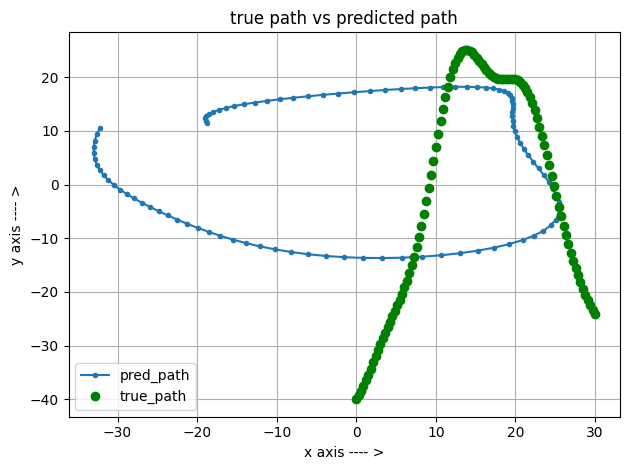

In [ ]:
#Answer here
time_points = np.linspace(0,30,100)
optm_wts = res.x #from previous cell
x_preds = getpred(time_points,optm_wts[:Nbases]) #uses first 10 parameters in 'example_w' to predict x location over time
y_preds = getpred(time_points,optm_wts[Nbases:]) #uses last 10 parameters in 'example_w' to predict y location over time
#concatenate the two vectors into an array of Nx2 coordinates.
pred_path = np.array([x_preds,y_preds]).T

#plotting the required path
plt.plot(pred_path[:,0],pred_path[:,1],'.-',label="pred_path") #pred_path plotting
plt.plot(dataset[1]['truepath'][:,0],dataset[1]['truepath'][:,1],'og', label = 'true_path') #true_path plotting
plt.xlabel("x axis ---- >")
plt.ylabel("y axis ---- >")
plt.title("true path vs predicted path")
plt.grid()
plt.legend(loc = 3)
plt.tight_layout()
plt.show()

## Question 8: Optimising the hyperparameters [6 marks]

- Do a grid search over the regularisation and the noise_scale hyperparameters.
- Select appropriate ranges (consider if linear or log ranges would be best).
- For each configuration of hyperparameters,
  - Loop over the first five datasets in `dataset`.
  - Optimise the parameters for each dataset.
  - We will be comparing the predictions with the values in `dataset[i]['truepath']`. The first column contains the time, so you will need to call `getpred` with `dataset[i]['truepath'][:,0]` as the times to get predictions for. The last two columns are the x, y coordinates.
  - Compute the sum squared error of all these predictions (i.e. simply find the sum squared difference between the predicted locations values and the true path, something like: `np.sum((ds['truepath'][:,1:]-preds)**2)`
  - You'll need to add up the sum squared errors for all 5 datasets, to get an overall error score.
  - Record this total sum squared error for each configuration of hyperparameters.
- Report the hyperparamters that minimise this sum squared error.

In [ ]:
# Answer here
# reg and noise_scale values to perform Grid search
reg_array = np.logspace(-3, 0, 4)
noise_scales= np.logspace(-3, 1, 4)
# Hyper parameter tuning using grid search to find best reg and noise parameters
def sum_squared_err(reg, noise_scale):
    # total error
    tot_error = 0 #initialized
    # Loop over the first 5 datasets
    for i in range(5):
        # dataset
        i_th_dataset = dataset[i]
        # true path
        true_path = i_th_dataset['truepath']
        # observations
        observations = i_th_dataset['observations']
        # initial weights
        w_0 = np.random.randn(Nbases * 2)
        # optimizing the parameters for using minimize
        res = minimize(totalnegloglikelihood, w_0, args = (observations, reg, noise_scale))
        # optimized weights
        optim_wts = res.x
        # predict the path using predicted time and optimum weights
        pred_path_t = truepath[:, 0]
        x_preds, y_preds = getpred(pred_path_t, optim_wts[:Nbases]), getpred(pred_path_t, optim_wts[Nbases:])
        # concatenate predicted path's, x and y-coordinates
        predictions = np.column_stack((x_preds, y_preds))
        # compute the sum of squared error
        err = np.sum((truepath[:,1:] - predictions)**2)
        tot_error += err
    return tot_error

#Parameter tuning
#Initialize the variables
best_reg = None
best_noise_scale = None
best_err = float('inf')
#Looping over reg array
for reg in reg_array:
    for noise_scale in noise_scales:
        err = sum_squared_err(reg, noise_scale)
        # Best hyperparameters
        if err < best_err:
            best_err = err
            best_reg = reg
            best_noise_scale = noise_scale

print(f"\n best_noise_scale parameter value: {best_noise_scale}")
print(f"best_regularization parameter value: {best_reg}")
print(f"best_total_error value: {best_err}")


 best_noise_scale parameter: 0.021544346900318832
best_regularization parameter: 1.0
best_total_error: 226702.24214648546


## Estimating uncertainty

We can estimate the uncertainty in our predictions. As the details of this approach are beyond the module, I've just put some information about how this is done at the end of this notebook for those who are interested. So for this question we just look at the result of the calculation.

Here are the set of samples using the Laplace approximation for `dataset[5]`.

<img src='https://drive.usercontent.google.com/download?id=1mvIwUBngNcIfKB3GmeLMITJg27D29Duh&export=download&authuser=0&confirm=t&uuid=e6be019a-6c83-4a92-a372-de9e73e1d627&at=AENtkXYw0QVYJdK2EInNTgiB6xa1:1730842927336' />

The black line shows the maximum a posteriori estimate, the grey lines are samples from the approximation to the posterior distribution of the parameters. The true path is in red. The blue lines indicate the observations made by our detectors.

To understand this a little more clearly, we can plot the distribution of predicted locations at a single time point (t=1.8s):

<img src="https://drive.usercontent.google.com/download?id=1abkQjHUrhmGwZ1AbZ0EbA8i98MjRA9Eh&export=download&authuser=0&confirm=t&uuid=e209d1d2-872f-4dbb-941a-ff1f7396271e&at=AENtkXbw7uKK2_c_2ExpdJsPpINe:1730842976324" />

The black cross (+) is the maximum a posteriori estimate, the scattered black points are samples from the posterior to illustrate the distribution. The true location is marked by the red disk, the first three observations (by coincidence all associated with the same detector) are plotted.

## Question 9: Explaining and Interpreting [14 marks]

- Q9a) Look at the above graph: Considering the early observations, explain why the posterior distribution of predicted locations at $t=1.8s$ has the distribution indicated? [3 marks]

- Q9b) Why does the predicted path at the start and end of the time series curl back into the centre of the plot? [3 marks]

- Q9c) Why are we evaluating the performance on `dataset[5]` and not one of the datasets used during optimising the hyperparameters? [1 mark]

- Q9d) Why was a Gaussian basis a good choice for this problem? [2 marks]

- Q9e) If the detectors had 'false positive' erroneous detections, the observations would contain outliers. Propose a change that could help address these outliers in the data. [2 marks]

- Q9f) What other hyperparamters could have been optimised? [1 mark]

- Q9g) If the width of the Gaussian bases was 30s instead of 3s, what effect would that have on the type of path that could be predicted? [2 marks]

**[Answer here]**

Q9a) At time t = 1.8s, it is just the start of the tracking, the model does not have enough data, less observed points invite more uncertainity. Since the observations are directional in nature and therefore, ths shape at given time,indicates  high uncertianity in predicted path due to lesser number of data points in the observations.

Q9b) The path is assumed to follow the Gaussian distribution, when we see a Gaussian distribution, the probability/predictability reduces at begining or end, when the bee is away from the center. That could be the reason the predicted path at start and end are comparatively lower in value, resu;lting in curl back shape towards the centre of the Gaussina basis.

Q9c) The datasets used during the hyperparameter tuning are already seen by the model, if the performance is evaluated on the already seen data it may not give the estimate of the efficiency. That is why we try to evaluate the performance on the dataset[5] which was not used for traning.

Q9d) Since the motion of the bees are continuous and are non-linear. Often bees movement can be localized around few centres in the entire trajectory of the path. Also the data collected about bees movement is more likely to contain noise. All these features are exhibited by Gaussian funcions, even smoothing out noise is easily possible by Gaussian function. Hence, Gaussian basis is a good choice for the problem.

Q9e) In  case the detectors had false positive erroneous data, or the outlier, it is always a good idea to avoid or remove outliers as those do not represent any important feature of data. To remove outliers, various techniques can be employed, example IQR technique, filtering techniques like smoothing, moving window average etc.

Q9f) Like any other model, there are large number of hyper parameters that can be tuned to improve the performance of the model. For example, tuning the parameters like, regularization parameter or the width of the Gaussian function, can be done using Grid search or random search CV.

Q9g) With the increase in the width of the Gaussian functions, more Gaussian functions would overlap and hence the path predicted will not be impacted by local variations, it would be more likely to produce smooth tracking path by reducing sensitivity to fluctuation or noise.

<hr>

# Part 2: Neural networks, Dimensionality reduction and Clustering

This is the *second* of the two parts, accounting for the other 50 marks of the overall coursework mark.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Question 1 straight away then you may still be able to progress with the other questions.

## Overview
This part of the assignment will cover:
- Q1: Classification and neural networks (lectures 5 and 6)
- Q2: Dimensionality reduction and clustering (lectures 7 and 8)

### Allowed libraries
For this part we are looking for you to demonstrate what you have learned in this module and so we will be restricting what libraries you can use to
- Numpy and Scipy
- Matplotlib
- PyTorch
- Scikit-Learn (for simple models)

### Assessment Criteria

- The marks for this part are distributed as follows:
    - **Q1**: 28 marks
    - **Q2**: 17 marks
    - **Code quality**: 5 marks
        - Marks for code quality does not cover the correctness of your answers to each section but rather the style and clarity of your code. You should aim to avoid repetition of code, have clear but concise comments and appropriately named variables.
- You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

If you are unsure about how to proceed then please ask during the lectures/labs or on the discussion board.



## Question 1: Classification and neural networks [28 marks]

This first question will look at implementing classifier models via supervised learning to correctly classify images.

We will be using images from the MedMNIST dataset which contains a range of health related image datasets that have been designed to be similar to the original digits MNIST dataset. Specifically we will be working with the OrganAMNIST part of the dataset. The code below will download the dataset for you and load the numpy data file. The data file will be loaded as a dictionary that contains both the images and labels already split to into training, validation and test sets. The each sample is a 28 by 28 greyscale image and are not necessarily normalised. You will need to consider any pre-processing.

Your task in this questions is to train **at least 4** different classifier architectures (e.g logistic regression, fully-connected network, convolutional network etc) on this dataset and compare their performance. These can be any of the classifier models introduced in class or any reasonable model from elsewhere. You should consider 4 architectures that are a of suitable variety i.e simply changing the activation function would score lower marks than trying different layer combinations.

This question will be broken into the following parts:
1) A text description of the model architectures that you have selected and a justification of why you have chosen them. Marks will be awarded for suitability, variety and quality of the architectures.
2) The training of the models and the optimisation of any hyper-parameters.
3) A plot comparing the training and test accuracy of the different architectures with a short discussion your results.

### About the dataset

For this question, you will be working with the OrganA-MNIST dataset. This is a benchmark dataset compiled using real CT scans of patients. The images have been localised and cropped to a 28 x 28 pixel image to replicate the original digits MNIST format. You can find out more information about the MedMNIST [here](https://arxiv.org/pdf/2110.14795). The code below will download the data for you, load the initial data dictionary and plot the 11 classes to visualise what the data is like. For OrganA-MNIST, it contains images of various organs: Left Lung, Right Lung, Heart, Liver, Spleen, Pancreas, Left Kidney, Right Kidney, Bladder, Left Fermoral Head, Right Femoral Head. However, there is no clear documentation relating the numerical class ids to these names. We will work only with the numerical labels but please be aware of this.

In [ ]:
import numpy as np
import urllib.request
import os
import torch
from torch import nn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import cv2  # For reading images if you need to load from files
from torchvision import datasets, transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import urllib.request

datafile = 'organamnist'

# Download the dataset to the local folder
if not os.path.isfile(f'./{datafile}.npz'):
    urllib.request.urlretrieve(f'https://zenodo.org/records/10519652/files/{datafile}.npz?download=1', f'{datafile}.npz')

# Load the compressed numpy array file
dataset = np.load(f'./{datafile}.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(f'dict key: {key:12s}, array shape: {dataset[key].shape}, array datatpye: {dataset[key].dtype}')

dict key: train_images, array shape: (34561, 28, 28), array datatpye: uint8
dict key: train_labels, array shape: (34561, 1), array datatpye: uint8
dict key: val_images  , array shape: (6491, 28, 28), array datatpye: uint8
dict key: val_labels  , array shape: (6491, 1), array datatpye: uint8
dict key: test_images , array shape: (17778, 28, 28), array datatpye: uint8
dict key: test_labels , array shape: (17778, 1), array datatpye: uint8


This dataset contains 11 classes.


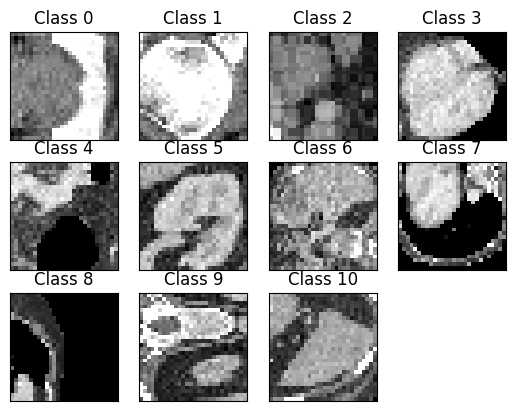

In [ ]:
import matplotlib.pyplot as plt

class_ids, class_first_occur = np.unique(dataset['train_labels'], return_index=True)

print(f'This dataset contains {len(class_ids)} classes.')

Nrows = 3; Ncols = 4
fig, ax = plt.subplots( Nrows, Ncols, sharex=True, sharey=True)

for i in range(Nrows):
    for j in range(Ncols):
        if( i*Ncols + j < len(class_ids)):
            idx = class_first_occur[i*Ncols + j]
            label = dataset['train_labels'][idx,0]
            ax[i,j].set_title(f'Class {label}')
            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([])
            ax[i,j].imshow(dataset['train_images'][idx], cmap='gray')
        else:
            ax[i,j].axis('off')
plt.show()


### 1.1: Initial analysis: clustering and dimensionality reduction [5 marks]

The first step of this question will be analyse the data using clustering and dimensionality reduction. In the following blocks you should:
1) Apply a **clustering algorithm** of your choice on the training data (using all 784 pixels as features unless there is a good reason to reduce first). Aim to split the data into 11 clusters.
2) After you have clustered the data, use a **dimensionality reduction algorithm** (e.g pca) to reduce the images to 3 dimensions.
3) Use these reduced dimensions to **create two 3d plots of the test images** with a) the points coloured using the true labels and b) the points coloured using the cluster labels. An example of a 3d plot is given below.
4) Provide a **short comment** on what observe from your clustered data.

For this sub-question you may use scikit-learn.

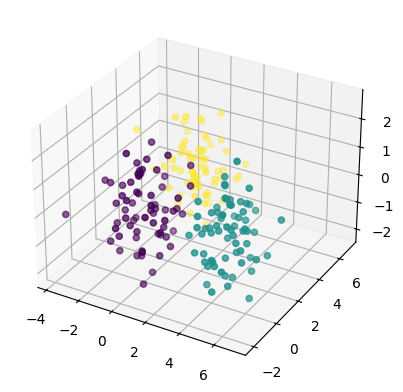

In [ ]:
 # Example of a 3d plot using matplotlib
from sklearn.datasets import make_blobs

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

example_x, example_labels = make_blobs(200, 3, centers=[[0.0, 0.0, 0.0], [5.0, 0.0, 0.0], [0.0, 5.0, 0.0]])

ax.scatter(example_x[:,0], example_x[:,1], example_x[:,2], c=example_labels)
plt.show()

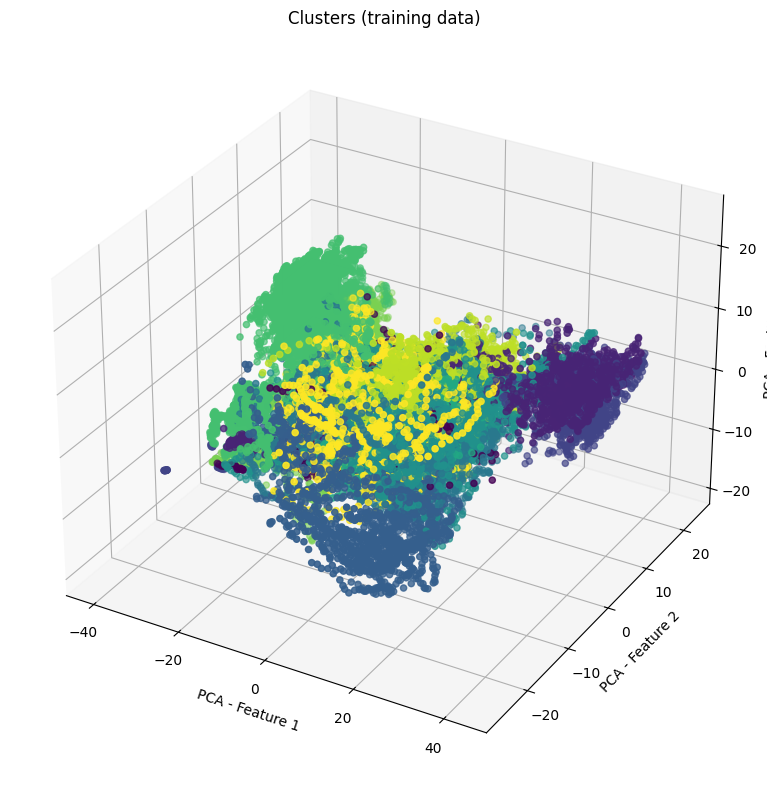

In [ ]:
# Load images for plotting
train_images = dataset['train_images']
train_labels = dataset['train_labels']
images = []
image_names = []

for i in range(train_images.shape[0]):
  images.append(train_images[i].flatten())
  image_names.append(train_labels[i][0])

images = np.array(images)
image_names = np.array(image_names)
#standisation or preprocessing on train images
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)
# Apply k means first, then PCA to reduce dimensions
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=34)
kmeans.fit(images_scaled)
pca = PCA(n_components=3)  # Reduce to 3 dimensions on train dataset
images_pca = pca.fit_transform(images_scaled)
# cluster centers
centers = kmeans.cluster_centers_
# Drawing the plot below by taking help from sample 3D plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(images_pca[:, 0], images_pca[:, 1], images_pca[:, 2], cmap='viridis', c=image_names)
# ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
#            marker='x', s=100 , linewidths=3)
ax.set_title("Clusters (training data)")
ax.set_xlabel("PCA - Feature 1")
ax.set_ylabel("PCA - Feature 2")
ax.set_zlabel("PCA - Feature 3")
plt.tight_layout()
plt.show()


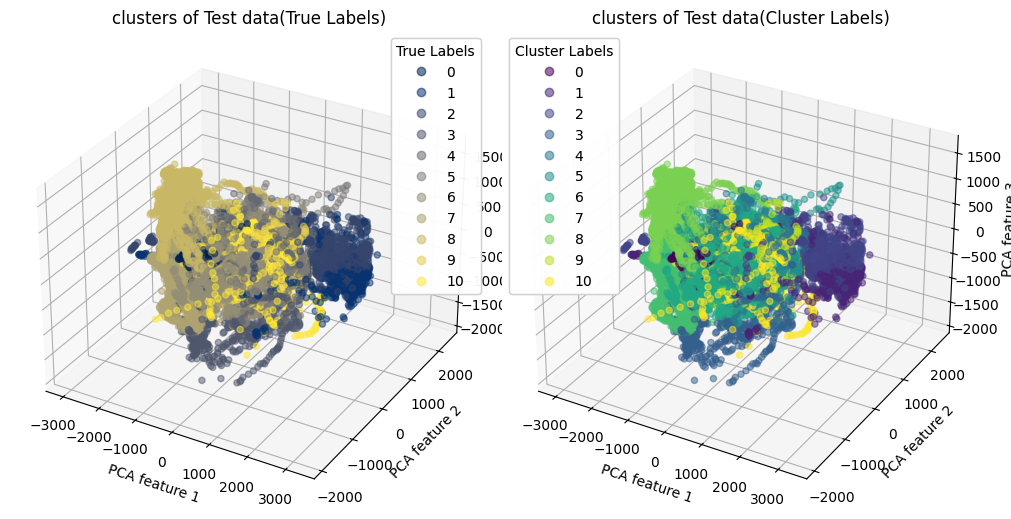

In [ ]:
# reshape Y & Y
X_test = dataset['test_images'].reshape(-1,28*28 )
true_labels = dataset['test_labels'].ravel()
# 11 clusters K-means
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_test)
# Perform PCA to reduce dimensionality
pca = PCA(n_components=3) # Reduce to 3 dimensions as asked
test_images_pca = pca.fit_transform(X_test)
fig = plt.figure(figsize=(10, 8))
# Plotting the true labels from Kmeans
ax_1 = fig.add_subplot(121, projection='3d')
scatter_1 = ax_1.scatter(test_images_pca[:, 0], test_images_pca[:, 1], test_images_pca[:, 2],
                      alpha=0.5, cmap='cividis', c=true_labels)
ax_1.set_title("clusters of Test data(True Labels)")
ax_1.set_xlabel("PCA feature 1")
ax_1.set_ylabel("PCA feature 2")
ax_1.set_zlabel("PCA feature 3")
legend_1 = ax_1.legend(*scatter_1.legend_elements(), title="True Labels")
ax_1.add_artist(legend_1)
# Plot on cluster labels
ax_2 = fig.add_subplot(122, projection='3d')
scatter_2 = ax_2.scatter(test_images_pca[:, 0], test_images_pca[:, 1], test_images_pca[:, 2],
                      alpha=0.5, cmap='viridis', c=true_labels)
ax_2.set_title("clusters of Test data(Cluster Labels)")
ax_2.set_xlabel("PCA feature 1")
ax_2.set_ylabel("PCA feature 2")
ax_2.set_zlabel("PCA feature 3")
legend_2 = ax_2.legend(*scatter_2.legend_elements(), title="Cluster Labels")
ax_2.add_artist(legend_2)
plt.tight_layout()
plt.show()


**Write your short comment on the clustering results in this markdown box.**


I don't see much of a difference in the position of points around the cluster centres when the test data is labelled using true labels or cluster labels.

### 1.2 What models/architectures have you chosen to implement [5 marks]

Now we will turn to applying classification models to this dataset, your task now is to choose 4 appropriate models or techniques and train them on the OrganA-MNIST dataset. These should have some distinct difference between them, for example a neural network with different number of layers is acceptable but having the same number layers with different sizes is not. This is not limited to neural networks but you should have at least one neural network model. Otherwise, you may use decision trees and/or logistic regression etc.

In the following block, write a short (max 400 words) **description and justification** of the architectures that you have chosen to implement. You should also think about any optimisers and error or loss functions that you will be using and why they might be suitable. We are looking for you to assess why the architectures are appropriate for the task at hand. Marks will be awared for clear and well reasoned justifications.

*I will be choosing 4 Neural architectures to train the models.*
*These four are:*

1.   **Decisision Tree**
*   Description - A non parametric supervised machine learning algorith, whic can be used both for classifiation and regression tasks.
*   Justification - I have chosen Decision Tree model as it is simple to implement, can be applied for classification task and takes less number of parameters to optimize. It is easy to interpret and it's not a black box unlike Neural networks.

*   Optimiser :- To optimise the model's performance, to avoid overfitting, underfitting; serveral hyper parameters like depth, min samples split, max sample split can be optimised.

2.   **Random Forest**

*   Description:  It consists of majority voting ny a number of Decision tree. It selects random samples, makes decision tree and uses them as voters, the class which gets maximum vote is predicted as output class.
*   Justification: It performs better than Decision Trees.
*   Optimiser: Optimisation achieved by tuning hyper parameters, number of estimators, max features selected, minimum samples split etc.

3.   **Support Vector Machine** Classifier
*   Description: It can perform both linear and non linear classification.

*   Justification: It utilizes kernels which transforms data or features to a high dimensional feature space, which help in prediction.
*   Optimiser: Kernel functions, regularisation parameter and gamma values need to be tuned to achieve high performance of the SVC.

4.   **Fully Connected Neural Network**
*   Description: Dense feed forward neural netwok with one or more hidden layers followed by activation function after each hiddenlayer.
*   Justification: It involves a wide range of activtion functions like, ReLU, tsnh, sigmoid, etc to bring non linearity across the complex interconnected neurons from previous layer to current to next layer.
*   Optimiser: Various parameters like number of hidden layers, activation functions, epochs etc can be tuned to achieve high performance



### 1.3 Implementation and training of your models. [10 marks]

a) Now implement the models that you have introduced above, train them and optimise any hyper-parameters using the validation set. You may wish to store any training results for the next sub-question.

In [ ]:
#Arrange your train & test data and their labels
x_train = dataset['train_images']
y_train = dataset['train_labels']
x_test = dataset['test_images']
y_test = dataset['test_labels']
x_val = dataset['val_images']
y_val = dataset['val_labels']

# Preprocessing the images (Flatten the images and normalize)
def standardise_data(dataset):
  x_train = dataset['train_images']
  y_train = dataset['train_labels']
  x_test = dataset['test_images']
  y_test = dataset['test_labels']
  x_val = dataset['val_images']
  y_val = dataset['val_labels']

  scaler = StandardScaler()

  train_images_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten train images
  x_train = scaler.fit_transform(train_images_flattened)  # Normalize the training images
  test_images_flattened = x_test.reshape(x_test.shape[0], -1)  # Flatten test images
  x_test = scaler.fit_transform(test_images_flattened)  # Normalize the test images
  y_test = dataset['test_labels'].ravel()
  y_train = dataset['train_labels'].ravel()
  val_images_flattened = x_val.reshape(x_val.shape[0], -1)
  x_val = scaler.fit_transform(val_images_flattened)
  y_val = dataset['val_labels'].ravel()
  return x_train, y_train, x_test, y_test, x_val, y_val



In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((34561, 28, 28), (34561, 1), (17778, 28, 28), (17778, 1))

##Training on Decision tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Get preprocessed data
x_train, y_train, x_test, y_test, x_val, y_val = standardise_data(dataset)
# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(x_test)

# Evaluate the model
testing_accuracy = accuracy_score(y_test, y_pred)
training_accuracy= accuracy_score(y_train, dt_clf.predict(x_train))
print(f'Training_Accuracy: {training_accuracy:.4f}')
print(f'Testing_Accuracy: {testing_accuracy:.4f}')

Training_Accuracy: 1.0000
Testing_Accuracy: 0.5573


In [ ]:
# Perform Hyper parameters tuning on the DT model
parameters = {'max_depth': [10, 20, 40],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2, 4]}
randomized_search = RandomizedSearchCV(estimator = dt_clf,
                                       param_distributions = parameters,
                                       cv=5, scoring='accuracy')
randomized_search.fit(x_train, y_train)
print(f"Best parameters from Decision tree: {randomized_search.best_params_}")


Best parameters from Decision tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
#Let's train on best hyper parameters and see how the DT performs on out dataset
best_dt_clf = DecisionTreeClassifier(max_depth=randomized_search.best_params_['max_depth'],
                                     min_samples_leaf=randomized_search.best_params_['min_samples_leaf'],
                                     min_samples_split=randomized_search.best_params_['min_samples_split'],
                                     random_state=42)
best_dt_clf.fit(x_train, y_train)
y_pred = best_dt_clf.predict(x_test)
# Evaluate the model again
DT_testing_accuracy = accuracy_score(y_test, y_pred)
DT_training_accuracy= accuracy_score(y_train, best_dt_clf.predict(x_train))
print(f'Best DT Training_Accuracy: {DT_training_accuracy:.4f}')
print(f'Best DT Testing_Accuracy: {DT_testing_accuracy:.4f}')


Best DT Training_Accuracy: 0.9745
Best DT Testing_Accuracy: 0.5557


## Training on Random Forest

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
# Split the dataset into train and test sets
# Step 3: Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)

# Step 4: Evaluate the model
y_pred = rf_clf.predict(x_test)
# Evaluate the model
testing_accuracy = accuracy_score(y_test, y_pred)
training_accuracy= accuracy_score(y_train, rf_clf.predict(x_train))
print(f'Training_Accuracy: {training_accuracy:.4f}')
print(f'Testing_Accuracy: {testing_accuracy:.4f}')

Training_Accuracy: 1.0000
Testing_Accuracy: 0.7814


In [ ]:
#Let's train on best hyper parameters and see how the RF performs on out dataset
# Perform Hyper parameters tuning on the DT model
parameters = {
    'n_estimators': randint(100, 1000),
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
}
randomized_search = RandomizedSearchCV(estimator = rf_clf, param_distributions = parameters, random_state=42,cv=5, n_jobs=-1)
randomized_search.fit(x_train, y_train)
print(f"Best parameters from Random Forest: {randomized_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters from Random Forest: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 574}


In [ ]:
#Let's train on best hypee parameters and see how the DT performs on out dataset
best_rf_clf = RandomForestClassifier(min_samples_leaf=randomized_search.best_params_['min_samples_leaf'],
                                     min_samples_split=randomized_search.best_params_['min_samples_split'],
                                     random_state=42)
best_rf_clf.fit(x_train, y_train)
y_pred = best_rf_clf.predict(x_test)
# Evaluate the model again
RF_testing_accuracy = accuracy_score(y_test, y_pred)
RF_training_accuracy= accuracy_score(y_train, best_rf_clf.predict(x_train))
print(f'Best Training_Accuracy: {RF_training_accuracy:.4f}')
print(f'Best Testing_Accuracy: {RF_testing_accuracy:.4f}')


Best Training_Accuracy: 1.0000
Best Testing_Accuracy: 0.7814


Training on SVM classifier

In [ ]:
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Get preprocessed data
x_train, y_train, x_test, y_test, x_val, y_val = standardise_data(dataset)
## Training a SVM
SVM_clf = svm.SVC(random_state=142, probability=True)
SVM_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = SVM_clf.predict(x_test)

# Evaluate the model
SVC_testing_accuracy = accuracy_score(y_test, y_pred)
SVC_training_accuracy= accuracy_score(y_train, SVM_clf.predict(x_train))
print(f'SVM Training_Accuracy: {SVC_training_accuracy:.4f}')
print(f'SVM Testing_Accuracy: {SVC_testing_accuracy:.4f}')

SVM Training_Accuracy: 0.9850
SVM Testing_Accuracy: 0.7857


In [ ]:
#Hyper parameter tuning for SVM
# Defining the parameters grid for RandomizedSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.001,0.01,0.1],
            'kernel':['linear','poly']}

# Creating a support vector classifier
svc=svm.SVC(random_state=142,probability=True)

# Creating a model using GridSearchCV with the parameters grid
randomized_search=RandomizedSearchCV(svc,param_grid)
# Training the model using the training data
randomized_search.fit(x_train,y_train)
print(f"Best parameters from SVM Classifier are: {randomized_search.best_params_}")

In [ ]:
# TO DO :#Let's train on best hypee parameters and see how the SVM performs on out dataset
best_svc_clf = svm.SVC(estimator=svc, param_grid=param_grid, cv=5,random_state=42)
best_svc_clf.fit(x_val, y_val)
y_pred = best_svc_clf.predict(x_test)
# Evaluate the model again
RF_testing_accuracy = accuracy_score(y_test, y_pred)
RF_training_accuracy= accuracy_score(y_train, best_svc_clf.predict(x_train))
print(f'Best Training_Accuracy: {RF_training_accuracy:.4f}')
print(f'Best Testing_Accuracy: {RF_testing_accuracy:.4f}')


### Training on Fully Connected Neural Network

In [ ]:
import torch.nn as nn
# Get preprocessed data
x_train, y_train, x_test, y_test, x_val, y_val = standardise_data(dataset)
# One-hot encoding on the labels
y_train = to_categorical(y_train, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)
# # Ensure the shapes are correct
# print('shapes : ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Define the model
fcnn_clf = Sequential([
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(11, activation='softmax')
])

# Compile and train the model
fcnn_clf.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history = fcnn_clf.fit(x_train, y_train, batch_size=16, validation_data=(x_test, y_test), epochs=200 )
# Evaluate the model on test data
test_loss, test_acc = fcnn_clf.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3497 - loss: 1.9107 - val_accuracy: 0.5409 - val_loss: 1.3923
Epoch 2/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6571 - loss: 1.0862 - val_accuracy: 0.6072 - val_loss: 1.1737
Epoch 3/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7254 - loss: 0.8705 - val_accuracy: 0.6345 - val_loss: 1.0881
Epoch 4/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7603 - loss: 0.7618 - val_accuracy: 0.6496 - val_loss: 1.0430
Epoch 5/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7837 - loss: 0.6852 - val_accuracy: 0.6623 - val_loss: 1.0128
Epoch 6/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8014 - loss: 0.6302 - val_accuracy: 0.6689 - val_loss: 0.9917
Epoch 7/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8130 - loss: 0.5992 - val_accuracy: 0.6753 - val_loss: 0.9766
Epoch 8/200
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8264 - loss: 0

In [ ]:
# Training and testing accuracy for the FCNN
testing_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_fcnn = history.history['accuracy']
print(f"{sum(training_accuracy_fcnn)/len(training_accuracy_fcnn): .3f}")
print(f"{sum(testing_accuracy_fcnn)/len(testing_accuracy_fcnn): .3f}")

 0.953
 0.706


b) In the following block, provide a description of how you have selected or optimised any hyper-parameters.

*For the Decision Tree, I used gridsearchcv to perform hypertuning on depth of tree, minimum samples leaf and minimum split to find best possible parameters. The model tried with distinct permutations and combinations to find best set of hyper parameters for the tree. For Random Forest, the classifier was tuned for minimum samples leaf, minimum samples split. SVM classifier used regularisation  parmater, kernel function range. FCNN could be hypertuned with number of epochs used for trainig, the loss function chossen and activation functions used after each hidden layer. Moreover, there are a wide list of hyper parameters available for each model.*

### 1.4 Classification results based on the test data [8 marks]

a) Create **two bar charts** that provides a comparison between your 4 models; the first should compare the classification accuracy on the training dataset, while the second should compare it on the test set.


In [ ]:
# Program your plots here.
import numpy as np
import matplotlib.pyplot as plt

def plot_bar_charts(accuracies, model_names, label, colours):
  plt.figure(figsize=(10, 4))
  width = 0.25
  height = 0.75
  bars = plt.bar(model_names, accuracies, color=colours, width= width)
  plt.xlabel('<--------------------Models------------------->')
  plt.ylabel('Accuracy ------->')
  plt.title(f'{label} for the models')
  plt.legend(bars, model_names, title='Models')
  plt.tight_layout()
  plt.show()

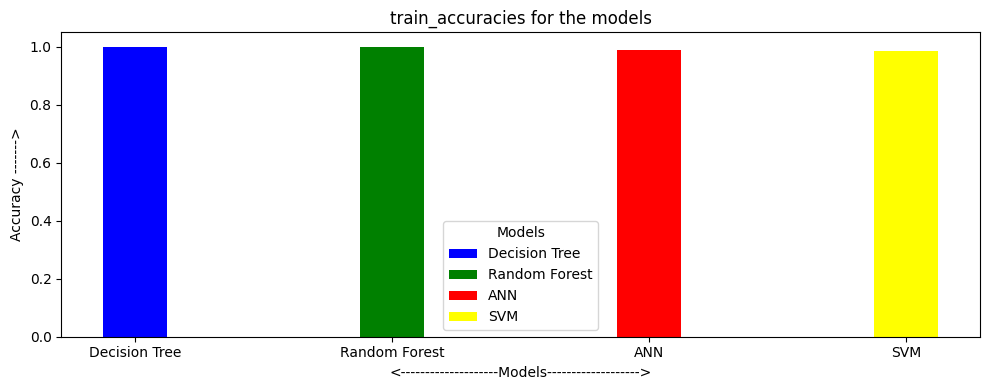

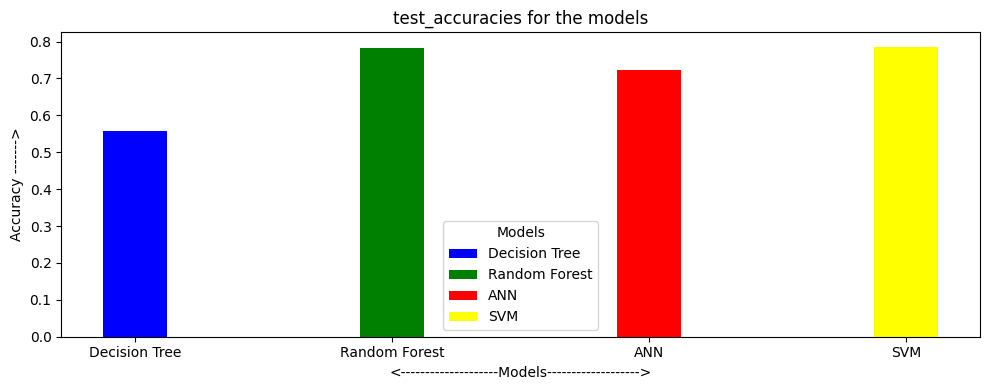

In [ ]:
test_accuracies = [0.557, 0.7814 , 0.723, 0.7857]
train_accuracies = [0.974,1.000,0.953,0.985]
model_names = ['Decision Tree', 'Random Forest', 'ANN', 'SVM']
colours = ['blue', 'green', 'red', 'yellow']
# SVM Classifier
#DT
# y_pred = best_dt_clf.predict(x_test)
# testing_accuracy_dt = accuracy_score(y_test, y_pred)
# training_accuracy_dt= accuracy_score(y_train, best_dt_clf.predict(x_train))
#Random Forest
# y_pred = best_rf_clf.predict(x_test)
# testing_accuracy_rf = accuracy_score(y_test, y_pred)
# training_accuracy_rf= accuracy_score(y_train, best_rf_clf.predict(x_train))
#FCNN
# testing_accuracy_fcnn
# training_accuracy_fcnn
# train_accuracies = [training_accuracy_dt, training_accuracy_rf, training_accuracy_rf  ]
# test_accuracies = [testing_accuracy_dt, testing_accuracy_rf, testing_accuracy_fcnn]
# Plotting the train and test accuracies for the models
plot_bar_charts(train_accuracies, model_names, "train_accuracies", colours)
plot_bar_charts(test_accuracies, model_names, "test_accuracies",colours)

b) Create and plot a **confusion matrix** for each of your models (4 plots in total) to compare their classification performance.

In [ ]:
# Program your plots here
def confusion_matrix_plot(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()



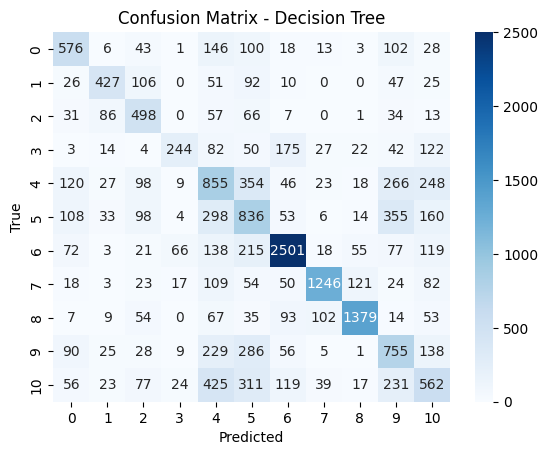

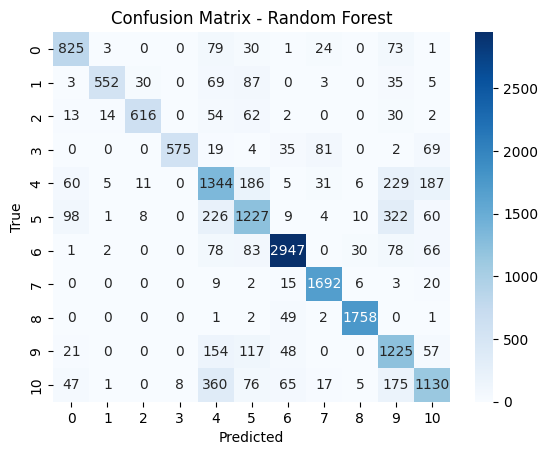

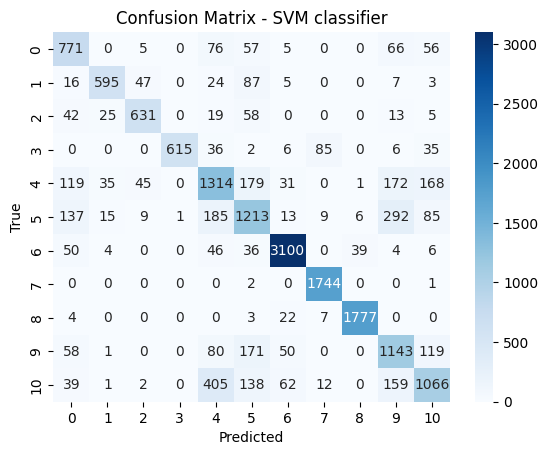

In [ ]:
#for each model, get the y_true, y_pred on its test data
#for DT
y_pred = best_dt_clf.predict(x_test)
confusion_matrix_plot(y_test, y_pred, "Decision Tree")
# For Random Forest
y_pred = best_rf_clf.predict(x_test)
confusion_matrix_plot(y_test, y_pred, "Random Forest")
# For SVM classifier
y_pred = SVM_clf.predict(x_test)
confusion_matrix_plot(y_test, y_pred, "SVM classifier")


In [ ]:
# For Fully Connected Neural Network
# y_pred = fcnn_clf.predict(x_test)
# confusion_matrix_plot(y_test, y_pred, "FCNN")

c) Now provide a **short discussion and analysis** of your results and any conclusions that you can make from the data.

From the above confusion matrices, Class 6 is predicted correctly by each model, most of the time. Each classifier makes incorrect predictions for class 4 and class 5. The models confused class 9 & 10 for class 4 and 5, it might be due to more similarity among these classes, which models could not distinguish on extracted features. Also class 4 and 5 may be quite similar features which makes the model confused to classify them correctly.


Discussion around accuracies:
Decision tree:
Testing:0.5557
Training:0.9745

Random Forest:
Testing accuracy:0.781
Training accuracy: 1.00

SVM:
Testing accuracy:0.7857
Training accuracy: 0.9850

FCNN:
Testing accuracy: 0.706
Training accuracy:0.953

The DT test accuracy is poor, just a little over random guessing. The model is over trained on taining data, unable to give good generaliasation. RForest model is overfitted. Performance of ANN also needs to be improved by hyper parameter tuning.

## 2. Denoising Autoencoder [17 marks]

### The CIFAR-10 dataset
In this assignment, we will work on the CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto. This dataset consists of 60,000  colour images in 10 classes, with 6,000 images per class. Each sample is a 3-channel colour images of 32x32 pixels in size. There are 50,000 training images and 10,000 test images.

### 2.1: Data loading and manipulation [3 marks]

**2.1a** Using the PyTorch Torchvision datasets, download both the training and test data of the CIFAR-10 dataset. If you find it more convenient, you may download them from a different source the Torchvision. For an example, please see the lab on Convolutional Neural Networks.

In [1]:
# Code your solution here
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision


# random seed as the ucard numnber
torch.manual_seed('001831171')
# Download the datasets
CIFAR_train_data = datasets.CIFAR10('data', train=True,download=True, transform=transforms.ToTensor())
CIFAR_test_data = datasets.CIFAR10('data', train=False,download=True, transform=transforms.ToTensor())
# DataLoader for training and test datasets
trainloader = torch.utils.data.DataLoader(CIFAR_train_data, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(CIFAR_test_data, batch_size=64, shuffle=False)
# Get original images and labels for further use
def get_original_images(trainloader):
  images, labels =[], []
  for image, label in trainloader:
      images.append(image)
      labels.append(label)
  images = torch.cat(images, dim=0)
  labels = torch.cat(labels, dim=0)
  return images, labels

images, labels = get_original_images(trainloader)

100%|██████████| 170M/170M [00:13<00:00, 13.1MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


**2.1b** Add random noise to all training and test data to generate noisy dataset, e.g., by torch.randn(), with a scaling factor scale, e.g., original image + scale * torch.randn(), and normalise/standardise the pixel values to the original range, e.g., using torch.clip(). You may choose any scale value between 0.2 and 0.5.

There are 2 ways to apply these random transformations using the latest version of Torchvision. Either are acceptable as long as the correct noise is applied.
- In the newer verions, PyTorch has introduced v2 transformations which includes directly a `GaussianNoise([mean, sigma, clip])` transformation (please see [here](https://pytorch.org/vision/master/transforms.html#color) for more details).
- If you are not using the vv2 transformations then random transformation can be applied using a `Lambda` [transform](https://pytorch.org/vision/stable/transforms.html) when composing the load data transform, which looks a little like this:  
`transforms.Lambda(lambda x: x + ..... )`

Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using torch.manual_seed(). This seed needs to be used for all remaining code if there is randomness, for reproducibility.

You may want to create separate dataloaders for the noisy and clear images but make sure they are **not shuffling the data** so that correct pair of images are being given as input and desired output.

In [2]:
# Code your solution here
def noise_image_generator(batch_images, scale = 0.25):
    """
    Add random noise to the original batches of images.
    Returns:
    - Noisy images.
    """
    torch.manual_seed(seed='001831171')
    noise = scale * torch.randn_like(batch_images)
    noisy_images = batch_images + noise
    noisy_images = torch.clip(noisy_images, 0.0, 1.0)
    return noisy_images

#Create a transformer as mentioned and apply on images
noisy_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: noise_image_generator(x))
])

# Apply trnasformer on already downloaded data
noisy_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=noisy_transform)
noisy_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=noisy_transform)
noisy_trainloader = torch.utils.data.DataLoader(noisy_trainset, batch_size=32, shuffle=False)
noisy_testloader = torch.utils.data.DataLoader(noisy_testset, batch_size=32, shuffle=False)

# Add noise to the images in the batch
noisy_images = noise_image_generator(images)

**2.1c** Show 10 pairs of original and noisy images.

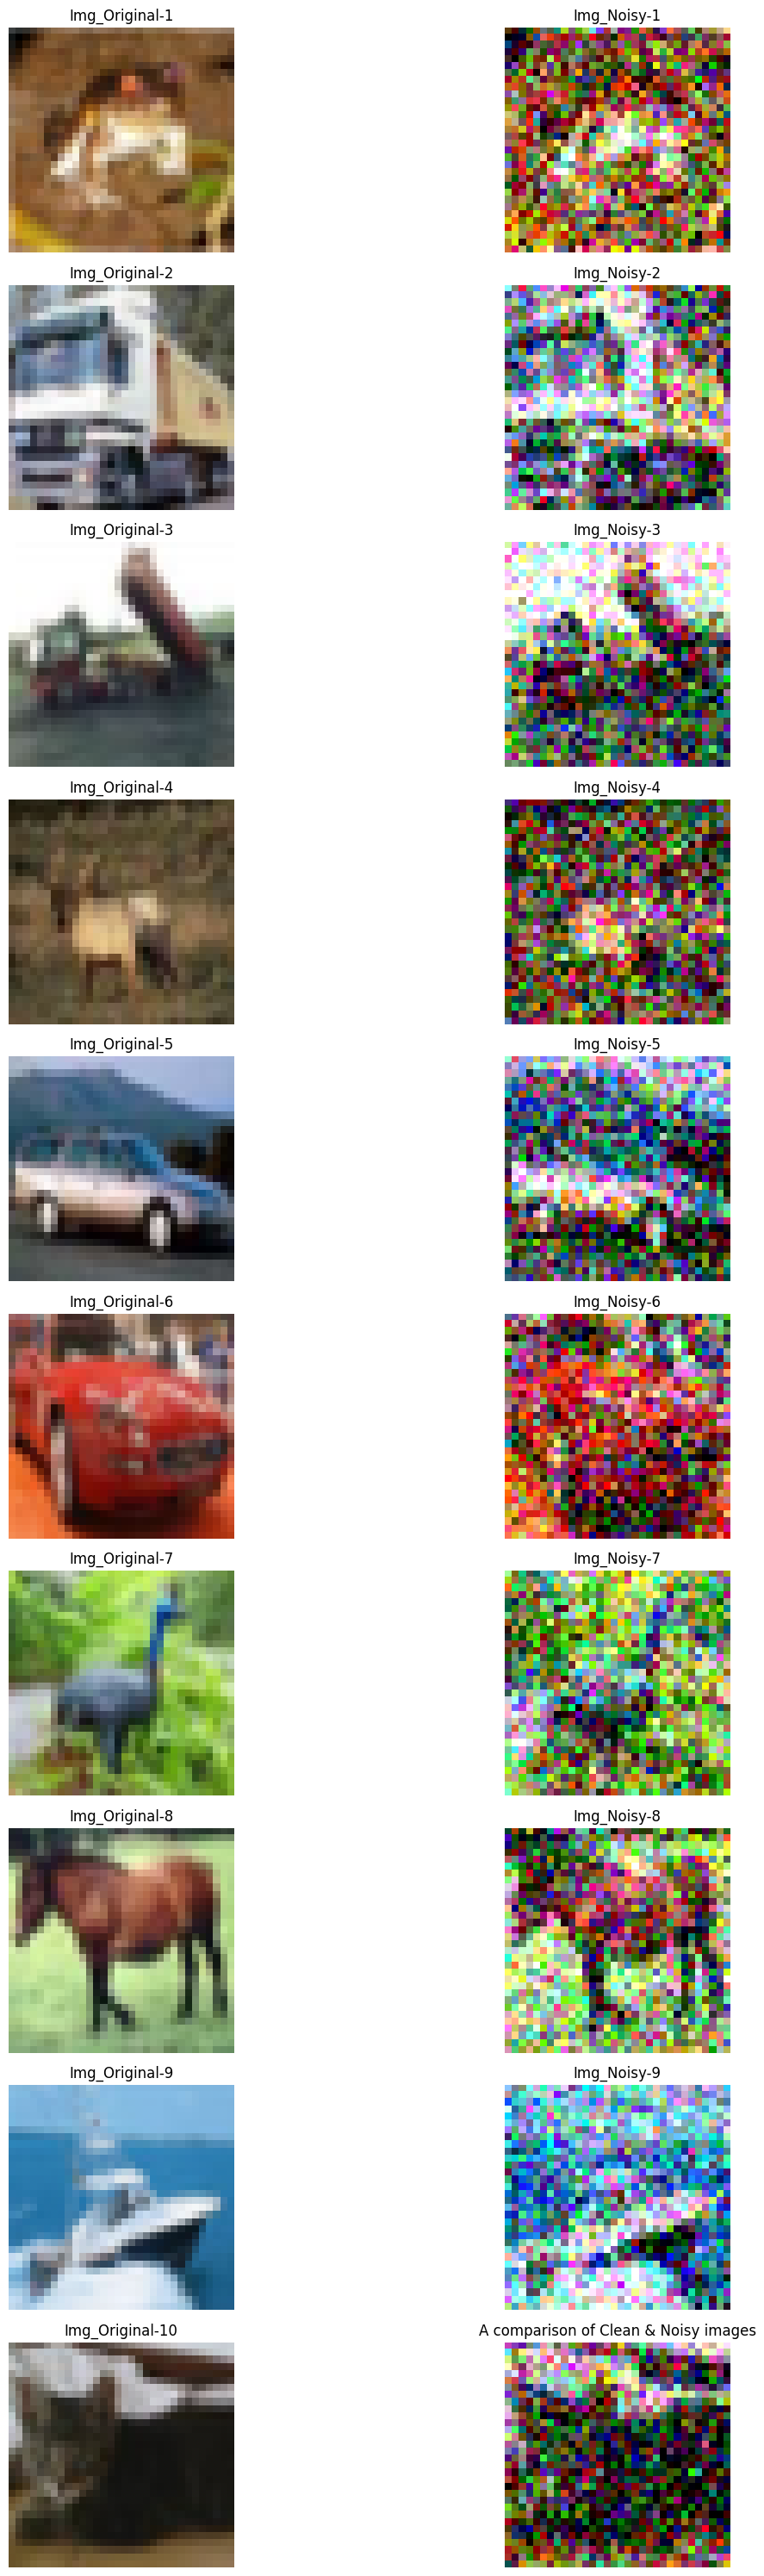

In [3]:
def show_images(images, noisy_images):
  fig, axes = plt.subplots(10, 2, figsize = (15, 30))
  for i in range(0,10):
      # Original image directly coming from downloaded dataset
      ax = axes[i, 0]
      ax.axis('off')
      ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
      ax.set_title(f"Img_Original-{i+1}")
      # Noisy images, after applying lambda transformations
      ax = axes[i, 1]
      ax.axis('off')
      ax.imshow(np.transpose(noisy_images[i].numpy(), (1, 2, 0)))
      ax.set_title(f"Img_Noisy-{i+1}")

  plt.tight_layout()
  plt.title("A comparison of Clean & Noisy images")
  plt.show()

show_images(images, noisy_images)


### 2.2 Applying a Denoising Autoencoder to the modified CIFAR10 [10 marks]

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).
Read about denoising autoencoders at [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

**2.2a** Modify the autoencoder architecture so that it takes colour images as input (i.e., 3 input channels).

In [4]:
# Code your solution here
# Denoising Autoencoder (DAE) Model Definition
class DAEncoder(nn.Module):
    def __init__(self):
        super(DAEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


**2.2b** Training: feed the noisy training images as input to the autoencoder

---

defined above; use a loss function that computes the reconstruction error between the output of the autoencoder and the respective original images.



In [5]:
# Initialize DA Autoencoder model
model = DAEncoder()
# optimizer, loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
# I ran 20 epochs earlier, the loss stabilized after 3 epochs, Therefore, now I train for at least 8 epochs to save compuation & time
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, _ in trainloader:
        # Add noise to the images
        noisy_images = noise_image_generator(images, 0.25)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(noisy_images)
        # Calculate the loss (MSE between original and reconstructed images)
        loss = criterion(outputs, images)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Loss:{running_loss / len(trainloader):.4f}, Number of epochs completed:{epoch+1}, ")


Loss:0.0166, Number of epochs completed:1, 
Loss:0.0104, Number of epochs completed:2, 
Loss:0.0090, Number of epochs completed:3, 
Loss:0.0082, Number of epochs completed:4, 
Loss:0.0077, Number of epochs completed:5, 
Loss:0.0074, Number of epochs completed:6, 
Loss:0.0071, Number of epochs completed:7, 
Loss:0.0068, Number of epochs completed:8, 
Loss:0.0066, Number of epochs completed:9, 
Loss:0.0063, Number of epochs completed:10, 
Loss:0.0061, Number of epochs completed:11, 
Loss:0.0059, Number of epochs completed:12, 
Loss:0.0058, Number of epochs completed:13, 
Loss:0.0056, Number of epochs completed:14, 
Loss:0.0055, Number of epochs completed:15, 
Loss:0.0054, Number of epochs completed:16, 
Loss:0.0053, Number of epochs completed:17, 
Loss:0.0052, Number of epochs completed:18, 
Loss:0.0051, Number of epochs completed:19, 
Loss:0.0050, Number of epochs completed:20, 


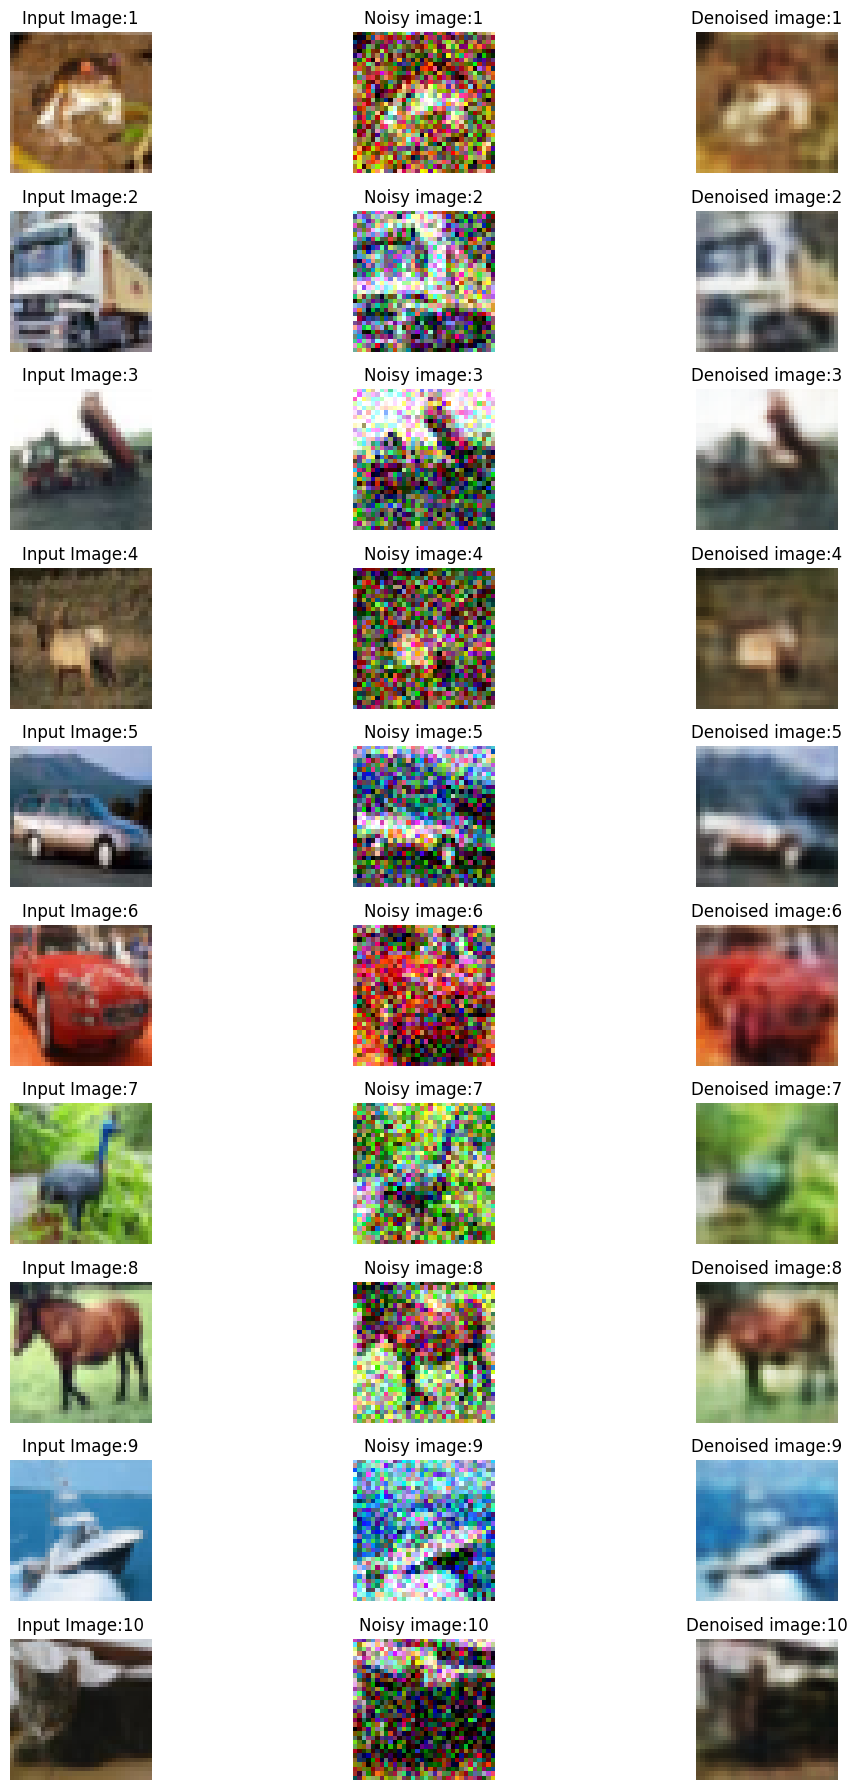

In [6]:
# Evaluate the DAEncoder
model.eval()

images, labels = get_original_images(trainloader)
# Add noise to input images
noisy_images = noise_image_generator(images, 0.25)
# Reconstructed (denoised) images
with torch.no_grad():
    denoised_images = model(noisy_images)
# Plot imgaes from input, noisy and denoised
fig, axes = plt.subplots(10, 3, figsize=(12, 18))
for i in range(10):
    # Input image
    ax = axes[i, 0]
    ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f"Input Image:{i+1}")
    # Noised image
    ax = axes[i, 1]
    ax.imshow(np.transpose(noisy_images[i].numpy(), (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f"Noisy image:{i+1}")
    # Cleaned image
    ax = axes[i, 2]
    ax.imshow(np.transpose(denoised_images[i].numpy(), (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f"Denoised image:{i+1}")
plt.tight_layout()
plt.show()

**2.2c** Testing: evaluate the autoencoder trained in 2.2b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the worst denoised 20 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (40 images to show in total).

In [ ]:
# Function to compute Mean Squared Error
def MSE_loss(input_images, denoised_images):
  ''' Returns mean square error as loss.'''
  img_diference = input_images - denoised_images
  mse_loss = torch.mean(img_diference ** 2, dim=(1, 2, 3))
  return mse_loss

# List to store the reconstruction errors
reconstruction_errors = []
noisy_images_list = []
original_images_list = []
# testloader created to iterate
testdataloader = torch.utils.data.DataLoader(CIFAR_test_data, shuffle=False, batch_size=64)
# Evluate the model
model.eval()

# Iterate over the test set and compute reconstruction errors
with torch.no_grad():
  for test_images, _ in testdataloader:
    # Add noise to the original clean images
    noisy_images = noise_image_generator(test_images, 0.25)
    # Get the reconstructed images
    denoised_images = model(noisy_images)
    # Compute the reconstruction error for each image in the batch
    batch_errors = MSE_loss(images, denoised_images)
    # Append the results
    noisy_images_list.extend(noisy_images)
    original_images_list.extend(images)
    reconstruction_errors.extend(batch_errors.numpy())

# Sort the errors in descending order
sorted_err_indices = sorted(range(len(reconstruction_errors)), key=lambda i: reconstruction_errors[i], reverse=True)

# 20 worst denoised images plotted
fig, axes = plt.subplots(20, 2, figsize=(20, 30))

for i, index in enumerate(sorted_err_indices[:20]):
    ax = axes[i, 0]
    ax.imshow(np.transpose(original_images_list[index].numpy(), (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f"Org_img: {i+1}")
    ax = axes[i, 1]
    ax.imshow(np.transpose(noisy_images_list[index].numpy(), (1, 2, 0)))
    ax.axis('off')
    ax.set_title(f"Noisy_img:{i+1}")

plt.tight_layout()
plt.show()


**2.2d** Choose at least **two** hyperparameters (e.g learning rate) to vary. Study at least **three** different choices for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. **Plot** the reconstruction error with respect to each of these hyper-parameters.

In [8]:
# train model, calculate Mean Square Error loss
def evaluate_reconstruction_errors(model, trainloader, testloader, learning_rate, batch_size, scale=0.3, epochs=10):
  # Set up optimizer
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, _ in trainloader:
      noisy_images = noise_image_generator(images, scale)
      optimizer.zero_grad()
      outputs = model(noisy_images)
      loss = criterion(outputs, images)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

  # Evaluate the model
  model.eval()
  reconstruction_errors = []
  noisy_images_list = []
  original_images_list = []

  with torch.no_grad():
    for test_images, _ in testloader:
      noisy_images = noise_image_generator(test_images, scale)
      # add images to list
      noisy_images_list.extend(noisy_images)
      original_images_list.extend(test_images)
      denoised_images = model(noisy_images)
      batch_errors = MSE_loss(test_images, denoised_images)
      reconstruction_errors.extend(batch_errors.numpy())

  return np.mean(reconstruction_errors)

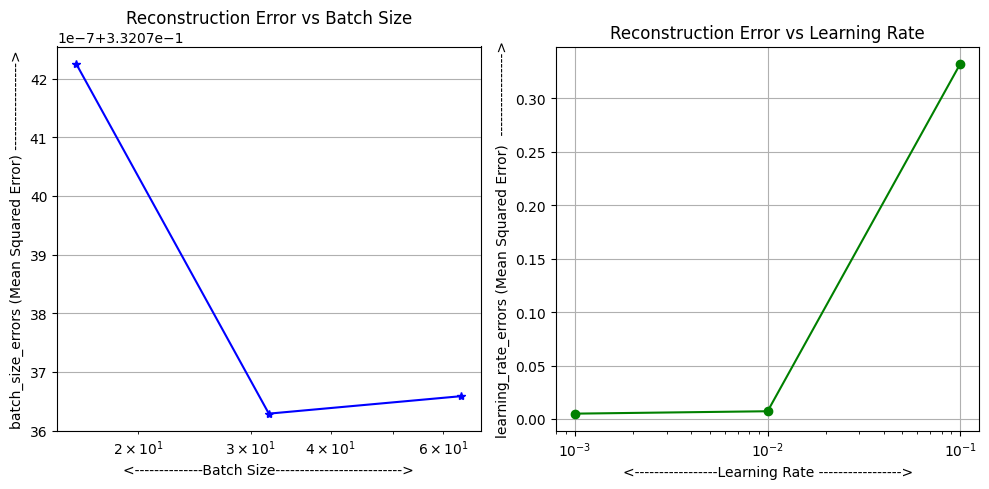

In [9]:
# List of hyperparameters to be tuned
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]

# Placeholder for errors
learning_rate_errors = []
batch_size_errors = []

# Study learning rates
for lr in learning_rates:
    trainloader = torch.utils.data.DataLoader(CIFAR_train_data, batch_size=64, shuffle=False)
    testloader = torch.utils.data.DataLoader(CIFAR_test_data, batch_size=64, shuffle=False)
    error = evaluate_reconstruction_errors(model, trainloader, testloader, lr, batch_size=32)
    learning_rate_errors.append(error)

# Study batch sizes
for bs in batch_sizes:
    trainloader = torch.utils.data.DataLoader(CIFAR_train_data, batch_size=bs, shuffle=False)
    testloader = torch.utils.data.DataLoader(CIFAR_test_data, batch_size=bs, shuffle=False)
    error = evaluate_reconstruction_errors(model, trainloader, testloader, learning_rate=0.001, batch_size=bs)
    batch_size_errors.append(error)

# Plot the results
plt.figure(figsize=(10, 5))
# Reconstruction Error vs Batch Size plot
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, batch_size_errors, marker='*', linestyle='-', color='b')
plt.title('Reconstruction Error vs Batch Size')
plt.xlabel('<--------------Batch Size-------------------------->')
plt.ylabel('batch_size_errors (Mean Squared Error) ------------------>')
plt.xscale('log')
plt.grid(True)
# Reconstruction Error vs Learning Rate plot
plt.subplot(1, 2, 2)
plt.plot(learning_rates, learning_rate_errors, marker='o', linestyle='-', color='g')
plt.title('Reconstruction Error vs Learning Rate')
plt.xlabel('<-----------------Learning Rate ----------------->')
plt.ylabel('learning_rate_errors (Mean Squared Error)  ----------------->')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.3 Discussion of results [4 marks]
**2.3a** Describe at least **two** interesting relevant observations from the evaluation results above.

When we look at the plot for the Learning rate vs Reconstruction error, I can conclude below observations:

1.   
Batch size is directly proportional to the amount of space/memory consumed while training, with small batch size (less than 32 in my case), the reconstruction error is more, may be because of overfitting during training or due to more difference/variance in each batch or the model is more sensitive. While, the reconstruction error goes up, if batch size increases (32+), maybe the model will not learn effectively and has generalised poorly. So to keep the model performance optimum, the moderate batch size must be preferred.



2. However, when the learning rate is lower, the model may learn the feautres which it should not and hence accumulate huge reconstruction error; also, the time taken to reach minima is much high. When the lr is higher, the model may miss the minima and may fail to update with optimum weights and biase parameters. Both high and low learning rates are not good with respect to the reconstruction error. Hence a tradeoff must be set, a moderate value of lr can help model learn optimal parameters and also reduce the time to train, also it makes mode perform stable on unseen test data.




>




